# Project:  statistical analysis - [auto-mpg]
### this notebook is for educational purpose . in this notebook we will go through some statistical concept and try to get some statistical insight and then i will clean the data and apply ML model

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#modeling">modeling</a></li>    
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> i will go through auto-mpg : this dataset is a slightly modified version of the dataset provided in the StatLib library. In line with the use by Ross Quinlan (1993) `in predicting the attribute "mpg"`, 8 of the original instances were removed because they had unknown values for the "mpg" attribute. 
- "The data concerns city-cycle `fuel consumption` in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5 continuous attributes." (Quinlan, 1993) 
    - Mpg: Miles per Gallon. 
      - " note :if the miles per gallon increase the fuel consumption will decrease" 
    - cylinders: No. of Cylinders.
    - displacement: Engine size "engine capacity ".
    - horsepower: Engine power.
    - Weight: Car weight.
    - acceleration: how fast can accelerate in seconds
    - model_year: Car year model.
    - Origin: Car country of manufacture.
        - 1 is for usa , 2 for europ and 3 for japan 
    - car_name: Car model.
    


- and i will go through some statistical analysis
### Question(s) for Analysis
> - what is the car that has less fuel consumption
 - the relation between cylinders and mpg 
 - the relation between displacement and mpg 
 - the relation between horsepower and mpg 
 - the relation between weight and mpg 
 - the relation between acceleration and mpg
 - the relation between model year and mpg
 - the relation between origin and mpg
 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set_palette('PuRd')

<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [2]:
df = pd.read_csv('auto-mpg.csv')

In [3]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [5]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
mpg,398,NaN,NaN,NaN,23.5146,7.81598,9,17.5,23,29,46.6
cylinders,398,NaN,NaN,NaN,5.45477,1.701,3,4,4,8,8
displacement,398,NaN,NaN,NaN,193.426,104.27,68,104.25,148.5,262,455
horsepower,398,94,150,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weight,398,NaN,NaN,NaN,2970.42,846.842,1613,2223.75,2803.5,3608,5140
acceleration,398,NaN,NaN,NaN,15.5681,2.75769,8,13.825,15.5,17.175,24.8
model year,398,NaN,NaN,NaN,76.0101,3.69763,70,73,76,79,82
origin,398,NaN,NaN,NaN,1.57286,0.802055,1,1,1,2,3
car name,398,305,ford pinto,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# i will start doing some statistical consept analysis
### mpg column : 

- i will start with mpg i can see that mean = 23.51 and mediam `50%` = 23 so i can see that mpg is a bit skewed to the right

Text(0.5, 1.0, 'MPG distrubution')

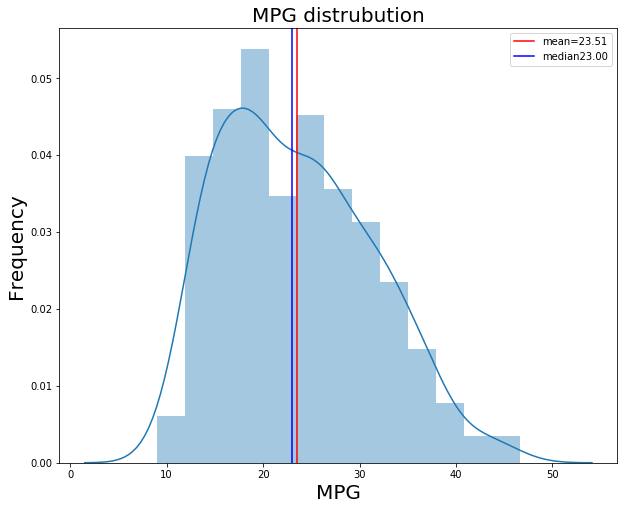

In [6]:
plt.figure(figsize=(10,8))
sns.distplot(df['mpg'])
mean = df['mpg'].mean()
median = df['mpg'].median()
plt.axvline(mean,label='mean',color='red')
plt.axvline(median,label='mean',color='b') # This function add the vertical lines across the axes of the plot
plt.legend([f'mean={mean:.2f}' , f'median{median:.2f}']);
plt.xlabel('MPG',fontsize=20)
plt.ylabel('Frequency',fontsize=20)
plt.title('MPG distrubution',fontsize=20)

#### distrubution type :
> so we were right the distrubution is a bit skewed to the right
#### distrubution summary :
> we have a mean mpg of 23.51 and because this distrubution is skewed to right there're little number of high-efficiency cars that drive many mileage per gallon (burns less amout of fuel `fuel consumption`).
#### std :
>  - now for std : 
- std = 7.81 so we can get that our data is not too much seperate and we can see that from the distrubution as we have a range from 0 - 50 only
 #### summary
> - from mean and median we can get how is our distrubution , and form std we can get an insight about the range but i have no number to tell me if there is outlier or not and i cant get that from the distrubution , one way to find the outliers is by using a boxplot

Text(0.5, 0, 'MPG')

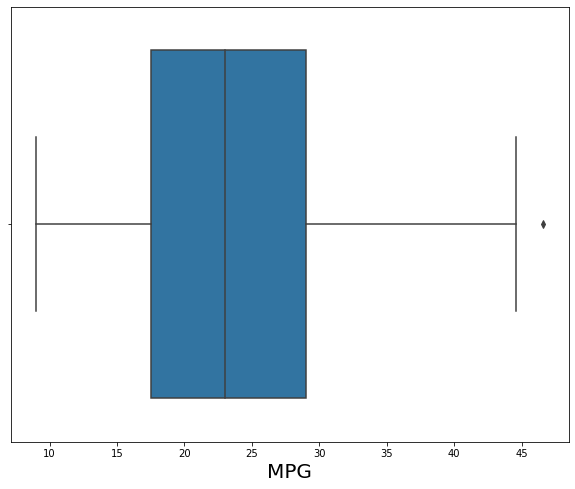

In [7]:
plt.figure(figsize=(10,8))
sns.boxplot(df['mpg']);
plt.xlabel('MPG',fontsize=20)

> so we have an  outlier at value > 45

# functions:

> because i will use the function to plot the distrubution i will impelement a function for that:
- i will use the code above but i will also add swarm plot

In [8]:
def drow_dist(data,x,x_lable):
    plt.figure(figsize=(18,7))
    plt.subplot(1,2,1)
    sns.distplot(data[x])
    mean = data[x].mean()
    median = data[x].median()
    plt.axvline(mean,label='mean',color='red')
    plt.axvline(median,label='mean',color='b')
    plt.legend([f'mean={mean:.2f}' , f'median{median:.2f}']);
    plt.xlabel(x_lable,fontsize=20)
    plt.ylabel('Frequency',fontdict={'fontsize':20})
    plt.suptitle(f'{x} distrubution',fontsize=20)
    plt.subplot(1,2,2)
    sns.swarmplot(data[x])
    plt.xlabel(x_lable,fontsize=20)
    plt.ylabel('Count',fontdict={'fontsize':20})

### displacement column : 

> second with the displacement column we did not see cylinders because its more likely to be discreat
- we have the mean = 193 and median = 148 so the distrubution will be skwed to right


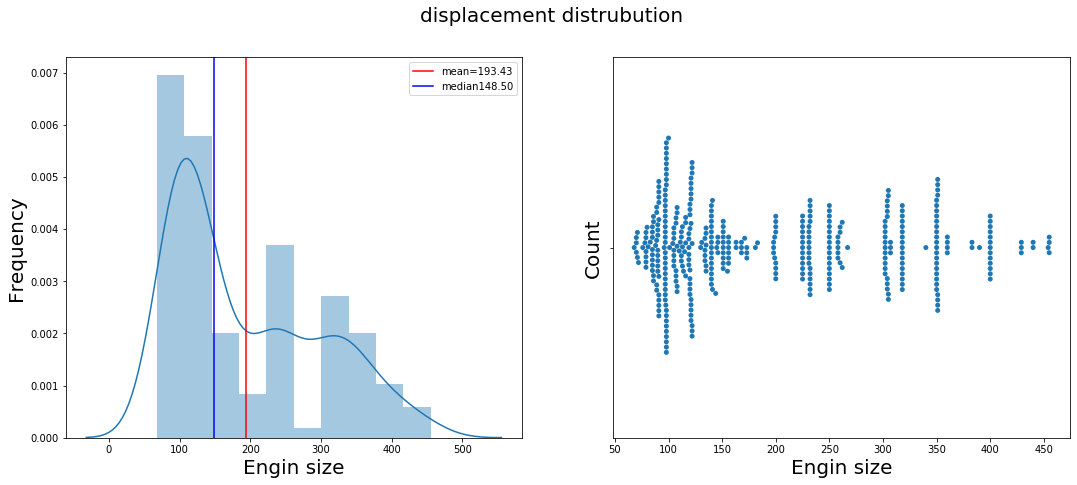

In [9]:
drow_dist(df,'displacement','Engin size')

#### distrubution type :
> so we were right the distrubution is right skwed
#### std :
>  - now for std : 
- std = 104.27 so we can get that our data is  too much seperate and we can see that from the distrubution as we have a range from 0 - 500 and remember the range of mpg was from 0 -50 and it's std was 7.81
 #### summary
> - from mean and median we can get how is our distrubution , and form std we can get an insight about the range but i have no number to tell me if there is outlier or not and i cant get that from the distrubution , one way to find the outliers is by using a boxplot

and for the outliers :

Text(0.5, 0, 'Engin size')

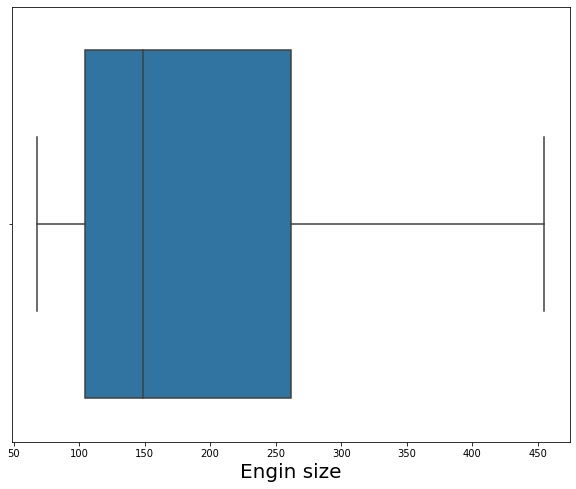

In [10]:
plt.figure(figsize=(10,8))
sns.boxplot(df['displacement']);
plt.xlabel('Engin size',fontsize=20)

> because the distrubution was skewed to right we can see that the right wiskers is longer than the left one
  - so from boxplot we can get the outliers and also the shape of the distrubution

### weight	column : 
> now for weight we can see that : the mean = 2970.42 and the median = 2803 so the distrubution will be : skewed to the right

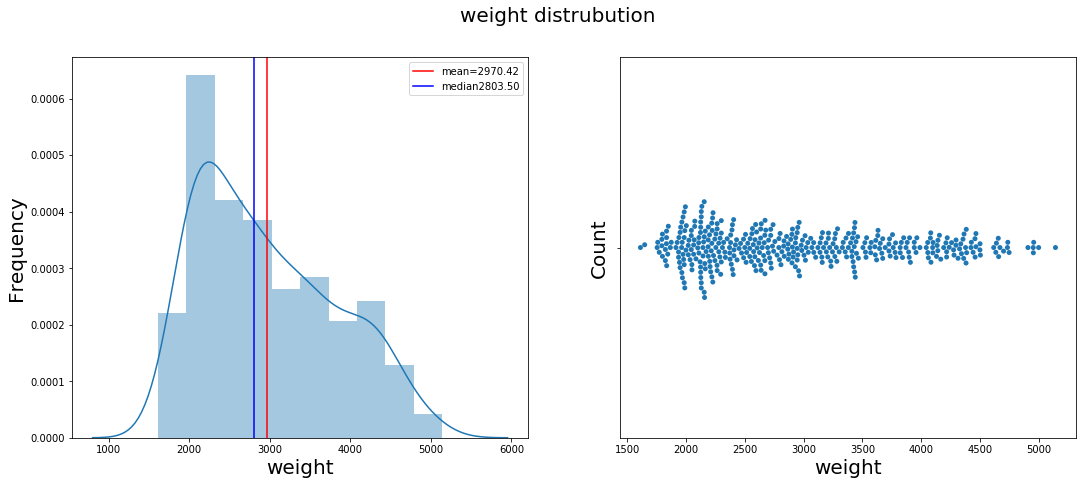

In [11]:
drow_dist(df,'weight','weight')

#### distrubution type :
> so we were right the distrubution is right skwed
#### distrubution type :
> - what right skewed tell us is : there is a few cars with high wright values
      - and if we had a left skewed that will tell us there are more cars with high values and less cars with low values
  - and we can get that cleary from the swarm plot as it give us the distrubution as count values that are not overlapping    
#### std :
>  - now for std : 
- std = 846.842 so we can get that our data is  too much seperate and we can see that from the distrubution as we have a range from 1000 - 5000 and remember the range of displacement was from 0 -500 and it's std was 104.27.

- for the outliers :

Text(0.5, 0, 'Weight')

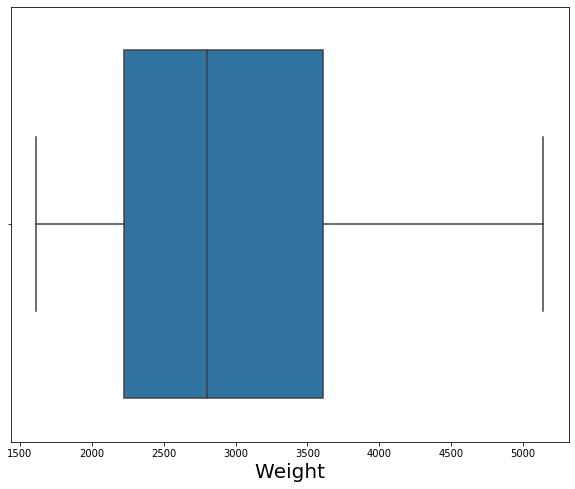

In [12]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df,x='weight')
plt.xlabel('Weight',fontsize=20)

> because the distrubution was skewed to right we can see that the right wiskers is longer than the left one
  - so from boxplot we can get the outliers and also the shape of the distrubution

### acceleration column

> for the last column `acceleration ` the distrubution will be normal because the mean and median is almost the smae in the column

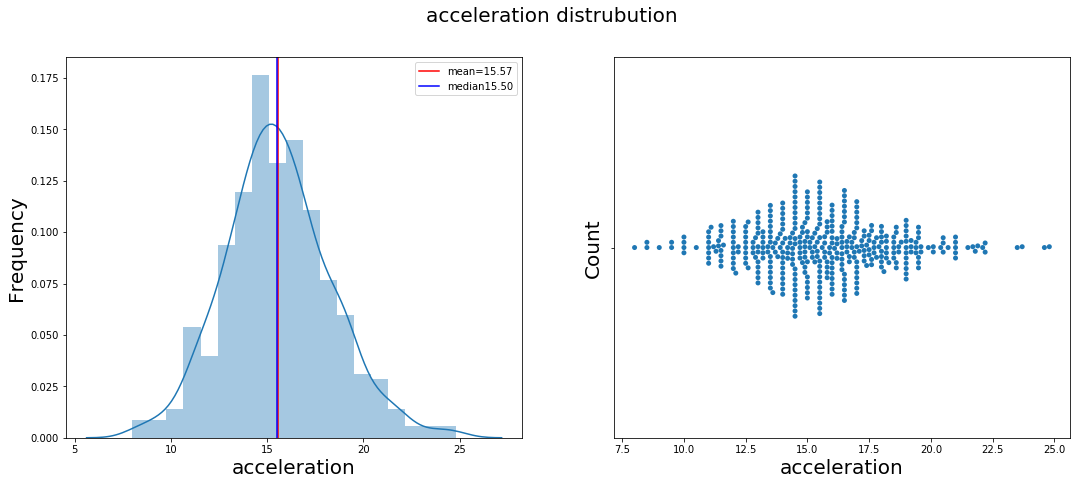

In [13]:
drow_dist(df,'acceleration','acceleration')
#plt.legend(["${\sigma}$ = %d"%std , f"mean = {mean:.2f}"])

#### distrubution type :
> so we were right the distrubution is normal distrubution
#### std :
>  - now for std : 
- std = 2.75769 so we can get that our data is  less seperate and we can see that from the distrubution as we have a range from 5 - 25 and remember the range of displacement was from 0 -500 and it's std was 104.27.

Text(0.5, 0, 'acceleration')

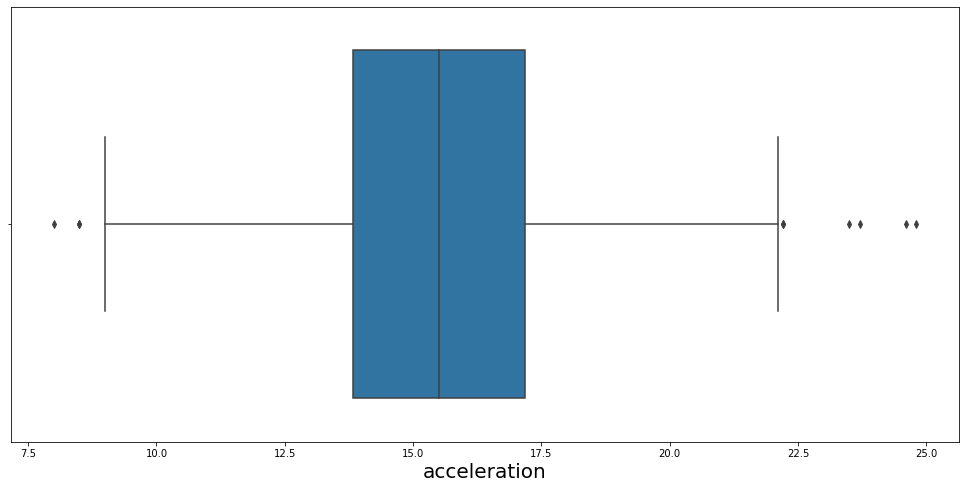

In [14]:
plt.figure(figsize=(17,8))
sns.boxplot(data=df,x='acceleration')
plt.xlabel('acceleration',fontsize=20)

> both wiskers are the same lenght and we have outliers

## cleaning :
> let's first check for null values

In [15]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

> no null values but we can see that the only wrong type is the hoursepower so let's see if there is ? or char need to be cleaned


In [16]:

df.query('(horsepower == "?")')

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


> yes we have 6 ? values we should replace and impute them

In [17]:
df['horsepower'].replace('?',np.NaN,inplace=True)
df['horsepower']=df['horsepower'].astype(float)

> now after converting the type to float let's see it's distrubution

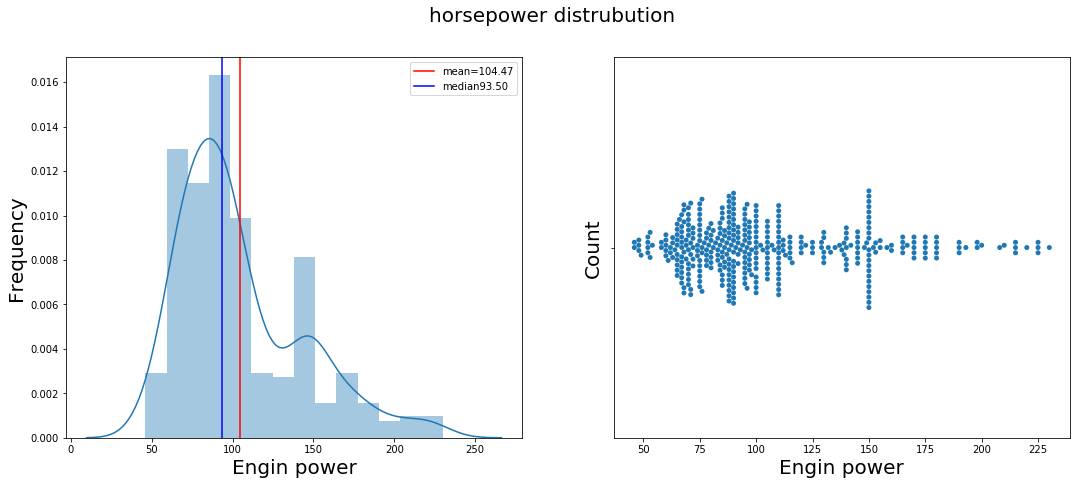

In [18]:
drow_dist(df,'horsepower','Engin power')

> this distrubution is right skewed so if i want to impute the NaN i will use the median

Text(0.5, 0, 'Engin power')

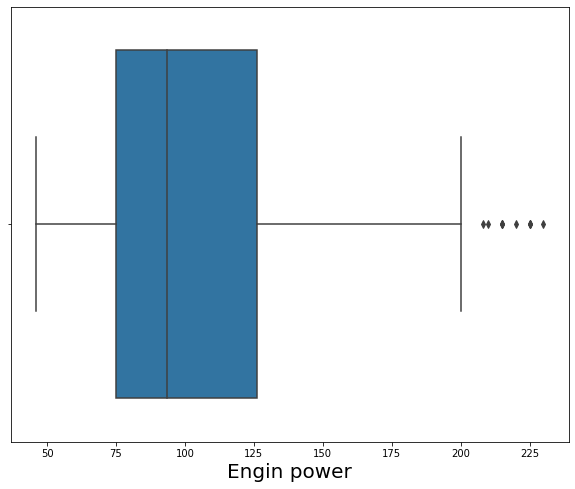

In [19]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df, x='horsepower')
plt.xlabel('Engin power',fontsize=20)

> and we have outliers

In [20]:
df['horsepower'].isnull().sum()

6

In [21]:
horsepower_median = df['horsepower'].median()
df['horsepower'].replace(np.NaN,horsepower_median,inplace=True)

In [22]:
df['horsepower'].isnull().sum()

0

> second let's change the name for some columns like: `model year`	 and `car name`  to easy acces

In [23]:
df.rename(columns={'model year':'model_year','car name':'car_name'},inplace=True)

In [24]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'car_name'],
      dtype='object')

> note i will drop the car_name because it have a lot of uniqu values so even if it's useful i can't use onehot encoder because it will be a lot of columns so i will just drop it
- note the data analysis is itirative process so it is normal to go again to a step and change things

In [25]:
df.drop('car_name',axis=1,inplace=True)

> for now i will leave the outliers and if the accuracy is not good i will go back and clean them

### Data Cleaning (summary!)
>- i changed some columns name like `model year` and `car name` i replaced the `' '` with `_`
- there was ? in horsepower column so i firsr replace them with NaN and them impute NaN with the median because this column was right skewed

<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 (the relation between cylinders and mpg!)
> cylinders had a min of 3 and max of 8 so it's descrit variable so we will use boxplot

In [26]:
cylinders_count=df['cylinders'].value_counts().sort_values(ascending=False)
cylinders_count

4    204
8    103
6     84
3      4
5      3
Name: cylinders, dtype: int64

Text(0.5, 1.0, 'car cylinders')

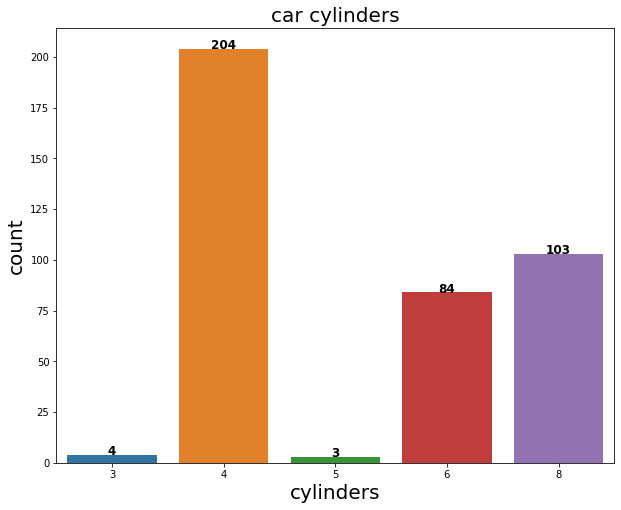

In [27]:
plt.figure(figsize=(10,8))
axes = sns.countplot(data=df,x='cylinders')
for patch in axes.patches:
    loc = patch.get_x()
    width = patch.get_width()
    height = patch.get_height()
    axes.text(loc+width/2, height, str(height), fontsize=12, weight='bold', ha='center')

plt.xlabel('cylinders',fontsize=20)
plt.ylabel('count',fontsize=20)
plt.title('car cylinders',fontsize=20)

>- we can see that there is no cylinder =7  
- and there is not much data for 3 and 5 but the rest is good 
- the most frequency cylinder is 4
- so let's see boxplot to see if this column can be used to pridect mpg or not

Text(0, 0.5, 'MPG')

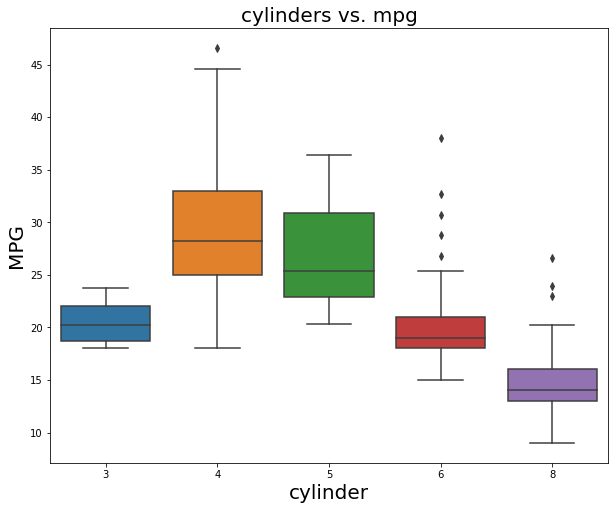

In [28]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df , x='cylinders',y='mpg');
plt.title('cylinders vs. mpg',fontsize=20)
plt.xlabel('cylinder',fontsize=20)
plt.ylabel('MPG',fontsize=20)

>- first we can see that the values of cylinders did not overlap so we can use that when cylender = 4 the car will have mpg of mean 27 so the best for cylinder is to be 4

### Research Question 2 (the relation between origin and mpg!)
>- the origin is categorical variable so we will use boxplot and barplot

In [29]:
origin_count= df['origin'].value_counts()
origin_count

1    249
3     79
2     70
Name: origin, dtype: int64

> - 1 is for usa , 2 for europ and 3 for japan
- note : in modiling i will convert origin by one hot encoder because it is now ordenar encoder which may lead to bise, so why so replace the numbers1,2,3 to it's label for this step and use hot hot encoder later as we was going to do

In [30]:
origin_count= df['origin'].value_counts()
origin_count

1    249
3     79
2     70
Name: origin, dtype: int64

In [31]:
df['origin'].replace([1,2,3],['usa','europe','japan'],inplace=True)

In [32]:
origin_count= df['origin'].value_counts()
origin_count

usa       249
japan      79
europe     70
Name: origin, dtype: int64

Text(0.5, 1.0, 'origin citys of cars')

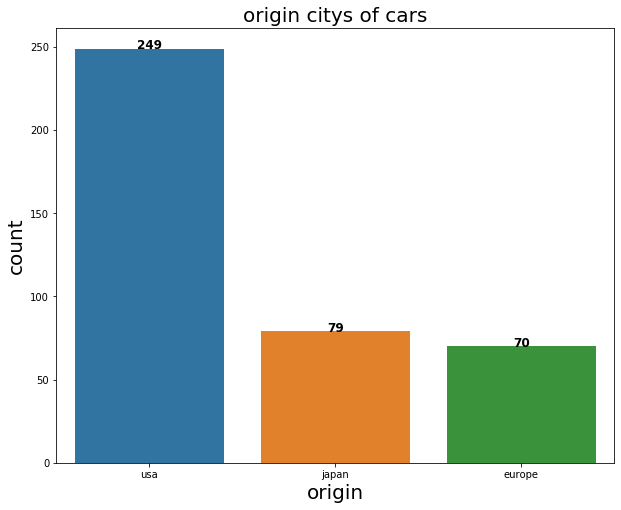

In [33]:
plt.figure(figsize=(10,8))
axes = sns.countplot(data=df,x='origin')
for patch in axes.patches:
    loc = patch.get_x()
    width = patch.get_width()
    height = patch.get_height()
    axes.text(loc+width/2, height, str(height), fontsize=12, weight='bold', ha='center')

plt.xlabel('origin',fontsize=20)
plt.ylabel('count',fontsize=20)
plt.title('origin citys of cars',fontsize=20)
#plt.xticks(np.arange(3),labels=('usa','europe','japan'));

Text(0.5, 1.0, 'origin countries of cars')

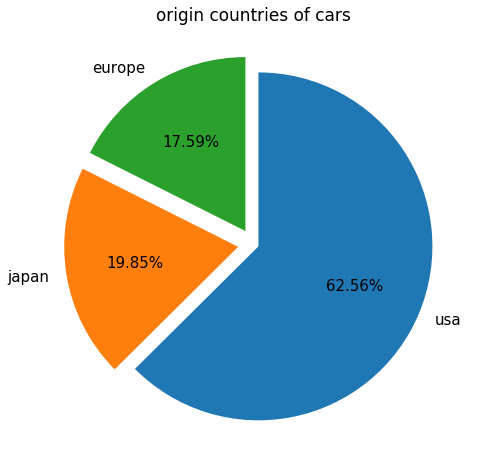

In [34]:
plt.figure(figsize=(8,8))
plt.pie(origin_count,autopct='%.2f%%',labels=origin_count.index,startangle=90,counterclock=False,
        explode=[0.03, 0.09,0.09],textprops={"fontsize":15});
plt.title('origin countries of cars',fontsize=17)

Text(0.5, 1.02, 'Mileage per gallon \n for each car orign country')

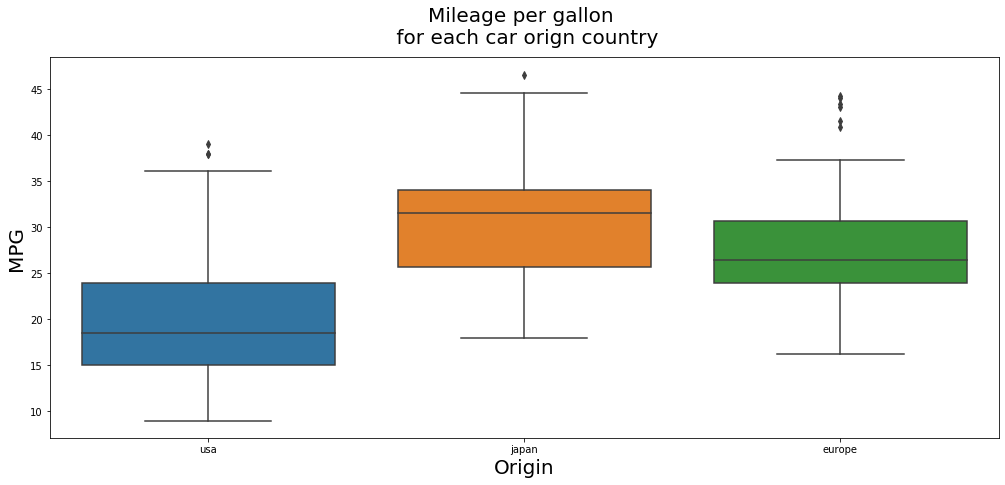

In [35]:
plt.figure(figsize=(17,7))
sns.boxplot(data=df , x='origin' , y='mpg');
#plt.xticks(np.arange(3),labels=('usa','europe','japan'));
plt.xlabel('Origin',fontsize=20)
plt.ylabel('MPG',fontsize=20)
plt.title("Mileage per gallon \n for each car orign country", y=1.02, fontsize=20)

> - there is no overlap between the three caregotical 
- we can say that the car from japan are the most effencient cars has the highest mpg with mpg average = 32 " less fuel consumption"
- and the car from usa are the least efficient ones with mpg average= 18

> # summary
- until now we see that the cars with cylender = 4 and the cars from japan has the less fuel consumption
- i will use these two categorical variabel to try to understand the rest of the columns

### Research Question 3 (the relation between Engine size and mpg!)
> the displacement is numerical so i will use scatter plot

Text(0.5, 1.0, 'the ralation between Engine size and mpg')

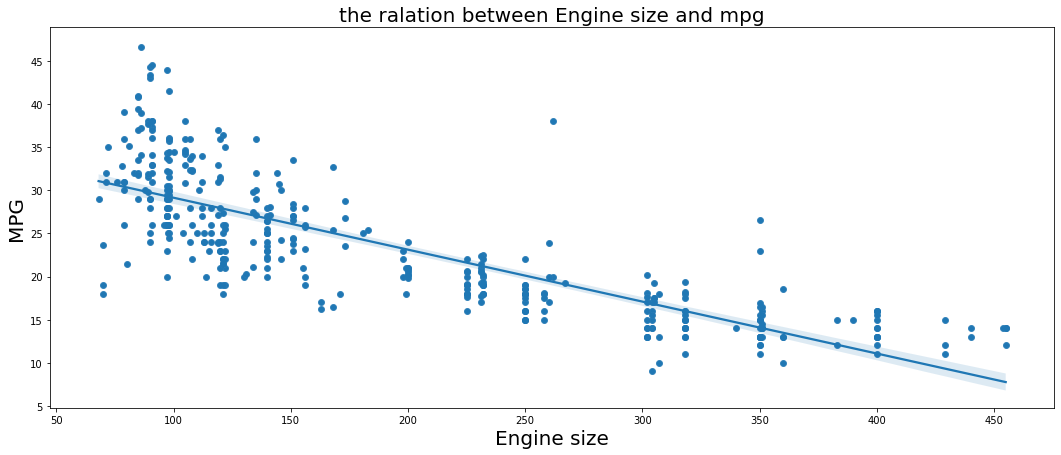

In [36]:
plt.figure(figsize=(18,7))
sns.scatterplot(data=df,x='displacement',y='mpg');
sns.regplot(data=df,x='displacement',y='mpg')
plt.xlabel('Engine size',fontsize=20)
plt.ylabel('MPG',fontsize=20)
plt.title('the ralation between Engine size and mpg',fontsize=20)

> we have a negative correlation between `Engine size and mpg` , as the engine size increase more fuel will be burn

Text(0.5, 1.0, 'Engine size per each cylinder')

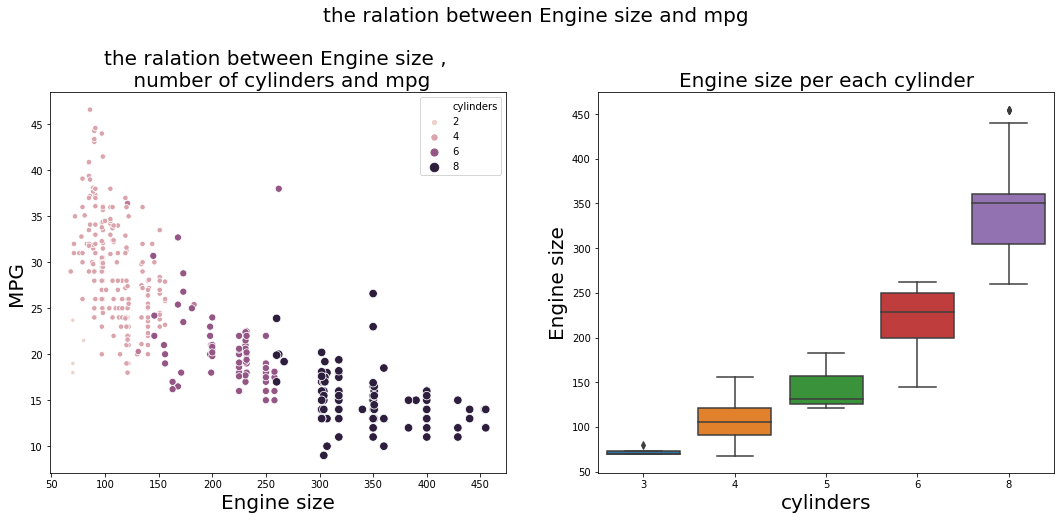

In [37]:
plt.figure(figsize=(18,7))
plt.subplot(1,2,1)
plt.suptitle('the ralation between Engine size and mpg',fontsize=20,y=1.05)
sns.scatterplot(data=df,x='displacement',y='mpg',hue='cylinders',size='cylinders');
plt.xlabel('Engine size',fontsize=20)
plt.ylabel('MPG',fontsize=20)
plt.title('the ralation between Engine size , \n number of cylinders and mpg',fontsize=20)
plt.subplot(1,2,2)
sns.boxplot(data=df,x='cylinders',y='displacement')
plt.ylabel('Engine size',fontsize=20)
plt.xlabel('cylinders',fontsize=20)
plt.title('Engine size per each cylinder',fontsize=20)

>-  as long as the engine size is small and we use a less number of cylinder like 4 there will be less fuel consumption 
- The more increasing of cylinders and the engin size the  the less efficient the car is, as It burns more fuel and drives less mileage per gallon.
- it makes sense that as the number of cylinder increase the engine size will increase too

Text(0.5, 1.0, 'Engine size per each origin')

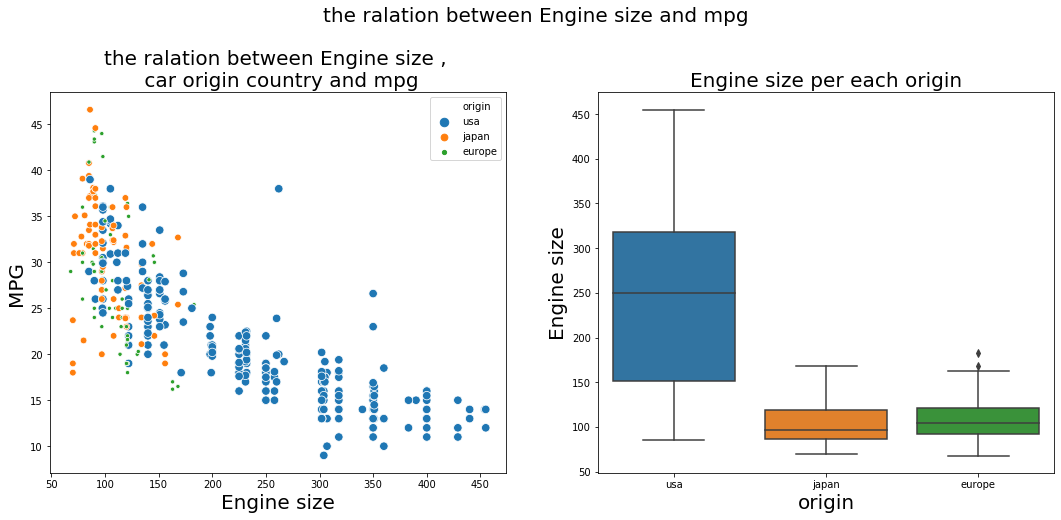

In [38]:
plt.figure(figsize=(18,7))
plt.subplot(1,2,1)
plt.suptitle('the ralation between Engine size and mpg',fontsize=20,y=1.05)
sns.scatterplot(data=df,x='displacement',y='mpg',hue='origin',size='origin');
plt.xlabel('Engine size',fontsize=20)
plt.ylabel('MPG',fontsize=20)
plt.title('the ralation between Engine size , \n car origin country and mpg',fontsize=20)
plt.subplot(1,2,2)
sns.boxplot(data=df,x='origin',y='displacement')
plt.ylabel('Engine size',fontsize=20)
plt.xlabel('origin',fontsize=20)
plt.title('Engine size per each origin',fontsize=20)

>- we can that that the country that uses a huge engine size is USA , nither japan nor europe has engine size larger than 170 
- using such big engin size like USA does make it has higher fuel consumption
- we have USA with the largest mean of Engine size with value = 250

Text(0, 0.5, 'Engin size')

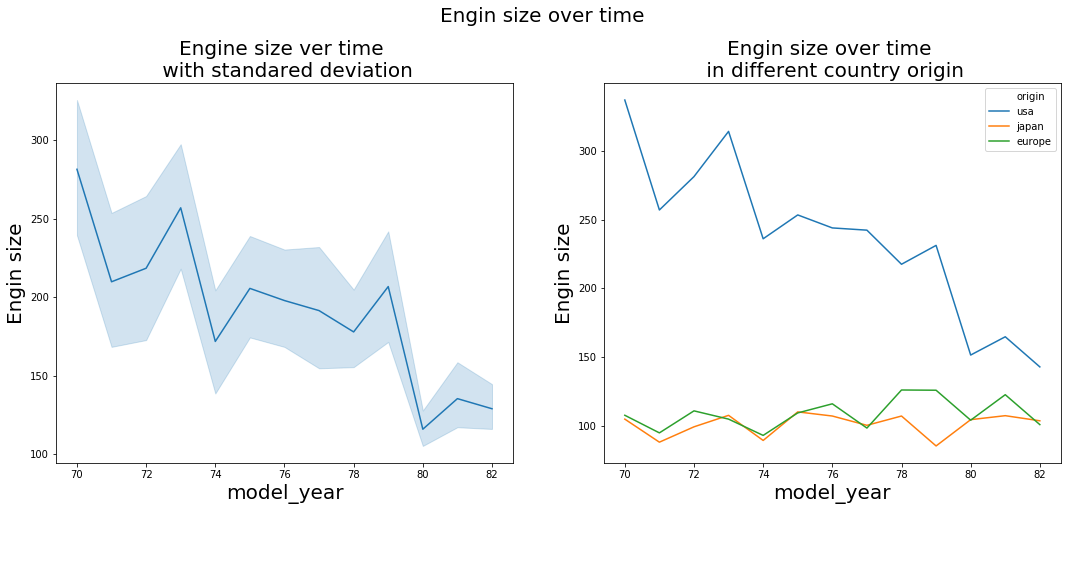

In [39]:
plt.figure(figsize=(18,7))
plt.subplot(1,2,1)
plt.suptitle('Engin size over time',fontsize=20, y=1.03)
sns.lineplot(data=df,x='model_year',y='displacement')
plt.title('Engine size ver time \n with standared deviation',fontsize=20)
plt.xlabel('model_year',fontsize=20)
plt.ylabel('Engin size',fontsize=20)
plt.annotate("'Std'", xy=(77,30), xytext=(75,32), arrowprops={'color':'r'})
plt.annotate("'average'", xy=(78,24), xytext=(75,27), arrowprops={'color':'r'})
plt.subplot(1,2,2)
sns.lineplot(data = df ,x='model_year',y = 'displacement',ci=None,hue='origin');
plt.title("Engin size over time \n in different country origin", fontsize=20)
plt.xlabel('model_year',fontsize=20)
plt.ylabel('Engin size',fontsize=20)

>- In the left graph, we can observe that There are some ups and downs, But average Engine size has decrease over time, with high standard deviation number.
- we can get that all these decrease is coming from USA becaue as we can see that japan and europe has Engine size deffer only from 105 to 50 over time 
- but we can see how USA tries to decrease Engine size from 380 to 150 over time

> # summary :
- untill now there are two reasons why USA the less efficicent country , because they use a huge number of cylinder and they engine size is so big that why there are so much fuel burn

In [40]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
mpg,398,NaN,NaN,NaN,23.5146,7.81598,9,17.5,23,29,46.6
cylinders,398,NaN,NaN,NaN,5.45477,1.701,3,4,4,8,8
displacement,398,NaN,NaN,NaN,193.426,104.27,68,104.25,148.5,262,455
horsepower,398,NaN,NaN,NaN,104.304,38.2226,46,76,93.5,125,230
weight,398,NaN,NaN,NaN,2970.42,846.842,1613,2223.75,2803.5,3608,5140
acceleration,398,NaN,NaN,NaN,15.5681,2.75769,8,13.825,15.5,17.175,24.8
model_year,398,NaN,NaN,NaN,76.0101,3.69763,70,73,76,79,82
origin,398,3,usa,249,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Research Question 4 (the relation between Engin power and mpg!)
>- the horsepower is numerical so we will use scatter plot

Text(0.5, 1.0, 'the ralation between Engine power and mpg')

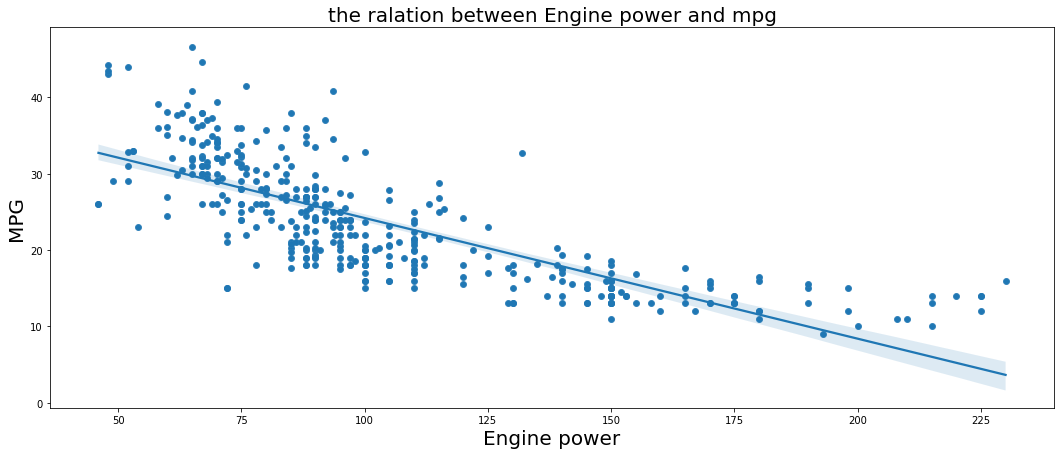

In [41]:
plt.figure(figsize=(18,7))
sns.scatterplot(data=df,x='horsepower',y='mpg');
sns.regplot(data=df,x='horsepower',y='mpg')
plt.xlabel('Engine power',fontsize=20)
plt.ylabel('MPG',fontsize=20)
plt.title('the ralation between Engine power and mpg',fontsize=20)

> we have a negative correlation between engin power and mpg , as the engine power increase more fuel will be burn

Text(0.5, 1.0, 'Engine power per each cylinder')

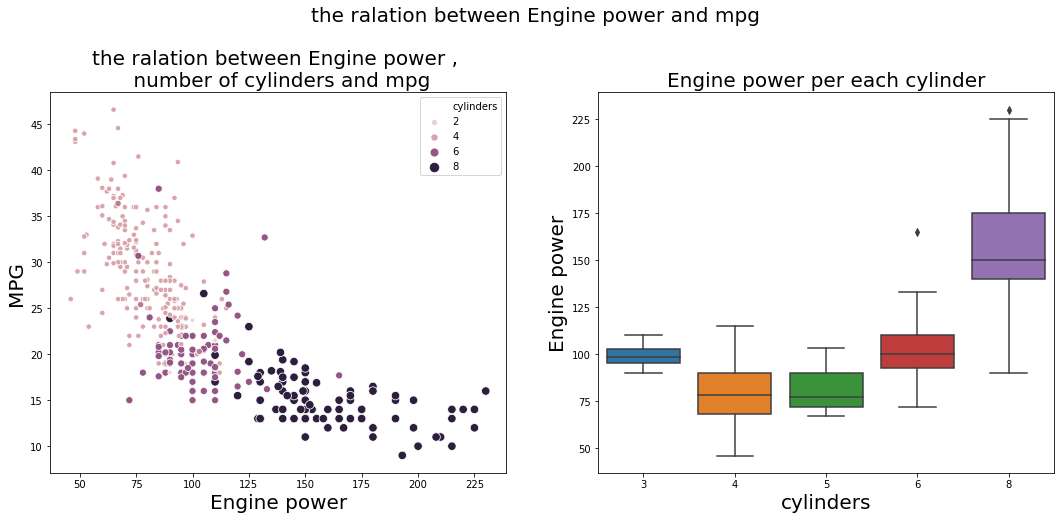

In [42]:
plt.figure(figsize=(18,7))
plt.subplot(1,2,1)
plt.suptitle('the ralation between Engine power and mpg',fontsize=20,y=1.05)
sns.scatterplot(data=df,x='horsepower',y='mpg',hue='cylinders',size='cylinders');
plt.xlabel('Engine power',fontsize=20)
plt.ylabel('MPG',fontsize=20)
plt.title('the ralation between Engine power , \n number of cylinders and mpg',fontsize=20)
plt.subplot(1,2,2)
sns.boxplot(data=df,x='cylinders',y='horsepower')
plt.ylabel('Engine power',fontsize=20)
plt.xlabel('cylinders',fontsize=20)
plt.title('Engine power per each cylinder',fontsize=20)

In [43]:
df.query('cylinders ==3')

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
71,19.0,3,70.0,97.0,2330,13.5,72,japan
111,18.0,3,70.0,90.0,2124,13.5,73,japan
243,21.5,3,80.0,110.0,2720,13.5,77,japan
334,23.7,3,70.0,100.0,2420,12.5,80,japan


In [44]:
df.query('cylinders == 4').head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
14,24.0,4,113.0,95.0,2372,15.0,70,japan
18,27.0,4,97.0,88.0,2130,14.5,70,japan
19,26.0,4,97.0,46.0,1835,20.5,70,europe
20,25.0,4,110.0,87.0,2672,17.5,70,europe
21,24.0,4,107.0,90.0,2430,14.5,70,europe


In [45]:
df.query('cylinders == 5')

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
274,20.3,5,131.0,103.0,2830,15.9,78,europe
297,25.4,5,183.0,77.0,3530,20.1,79,europe
327,36.4,5,121.0,67.0,2950,19.9,80,europe


>- the negative correlation  is also between the number of cylinder and mpg 
-  The more increasing of cylinders and car's engine power the less efficient the car is, as It burns more fuel and drives less mileage per gallon. 
- 8 cylinder has the largest engine power which means more fuel burn and less MPG
- but what interest me is 3 cylinder as it has average engine power larger than both 4 and 5 and we can see that from the only 4 rows for 3 cylinder it has engine power > 90 while in 4 and 5 cylinder i have values that less than 90 and can get to 67

Text(0.5, 1.0, 'Engine power per each origin')

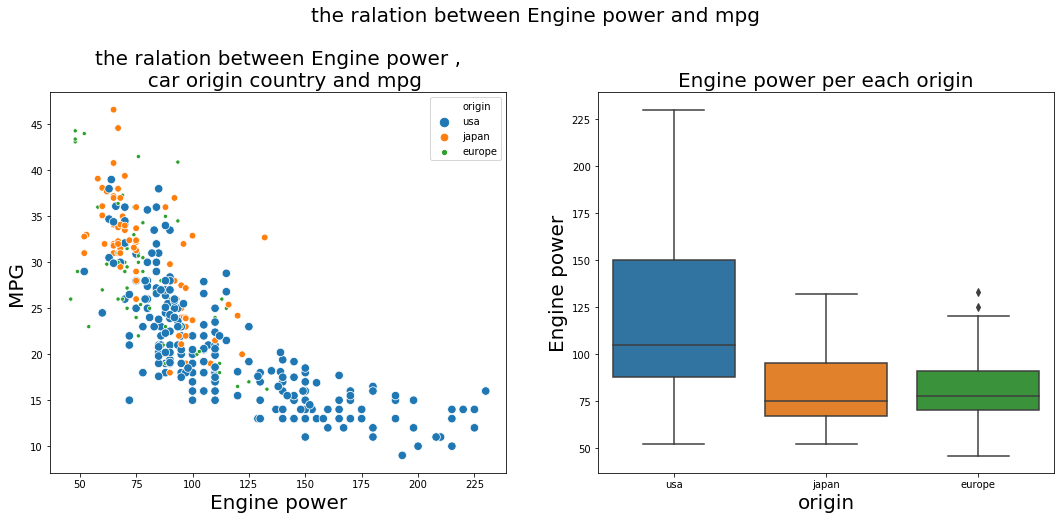

In [46]:
plt.figure(figsize=(18,7))
plt.subplot(1,2,1)
plt.suptitle('the ralation between Engine power and mpg',fontsize=20,y=1.05)
sns.scatterplot(data=df,x='horsepower',y='mpg',hue='origin',size='origin');
plt.xlabel('Engine power',fontsize=20)
plt.ylabel('MPG',fontsize=20)
plt.title('the ralation between Engine power ,\n  car origin country and mpg',fontsize=20)
plt.subplot(1,2,2)
sns.boxplot(data=df,x='origin',y='horsepower')
plt.ylabel('Engine power',fontsize=20)
plt.xlabel('origin',fontsize=20)
plt.title('Engine power per each origin',fontsize=20)

>- the negative correlation  is also between the orign and mpg 
-  as long as the horsepower is small and the car from japan or europe there will be less fuel consumption 

Text(0, 0.5, 'Engin power')

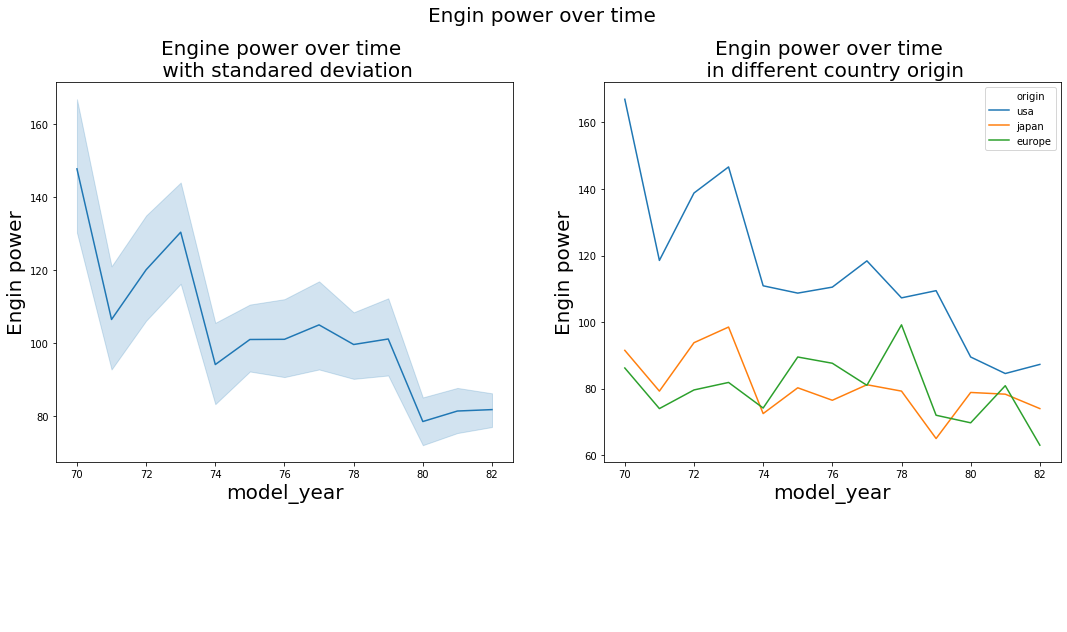

In [47]:
plt.figure(figsize=(18,7))
plt.subplot(1,2,1)
plt.suptitle('Engin power over time',fontsize=20, y=1.03)
sns.lineplot(data=df,x='model_year',y='horsepower')
plt.title('Engine power over time \n with standared deviation',fontsize=20)
plt.xlabel('model_year',fontsize=20)
plt.ylabel('Engin power',fontsize=20)
plt.annotate("'Std'", xy=(77,30), xytext=(75,32), arrowprops={'color':'r'})
plt.annotate("'average'", xy=(78,24), xytext=(75,27), arrowprops={'color':'r'})
plt.subplot(1,2,2)
sns.lineplot(data = df ,x='model_year',y = 'horsepower',ci=None,hue='origin');
plt.title("Engin power over time \n in different country origin", fontsize=20)
plt.xlabel('model_year',fontsize=20)
plt.ylabel('Engin power',fontsize=20)

> # summary :
- until now the car will be more efficient if it's desplacement and hoursepower are small , has 4 cylinder and from japan

> ### Research Question 4 (the relation between model_year and mpg!)
- we have model year from year 70 to 82 

In [48]:
df['model_year'].value_counts().sort_values()

74    27
77    28
72    28
71    28
81    29
80    29
79    29
70    29
75    30
82    31
76    34
78    36
73    40
Name: model_year, dtype: int64

Text(0, 0.5, 'MPG')

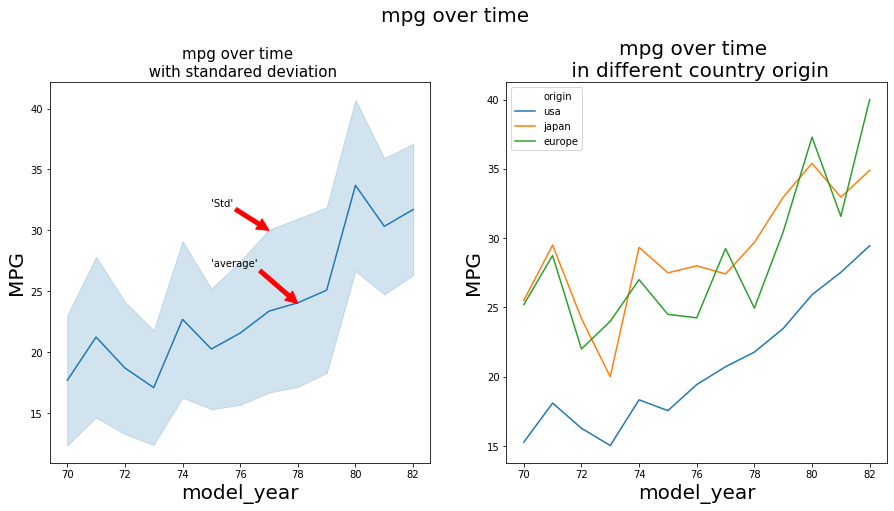

In [49]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.suptitle('mpg over time',fontsize=20, y=1.03)
sns.lineplot(data = df ,x='model_year',y = 'mpg',ci='sd');
plt.title("mpg over time \n with standared deviation", fontsize=15)
plt.xlabel('model_year',fontsize=20)
plt.ylabel('MPG',fontsize=20)
plt.annotate("'Std'", xy=(77,30), xytext=(75,32), arrowprops={'color':'r'})
plt.annotate("'average'", xy=(78,24), xytext=(75,27), arrowprops={'color':'r'})
plt.subplot(1,2,2)
sns.lineplot(data = df ,x='model_year',y = 'mpg',ci=None,hue='origin');
plt.title("mpg over time \n in different country origin", fontsize=20)
plt.xlabel('model_year',fontsize=20)
plt.ylabel('MPG',fontsize=20)

>- In the left graph, we can observe that There are some ups and downs, But average miles per gallon has increased over time, with high standard deviation number.
- In the right graph we can observe that mileage per gallon in cars with the USA country origin has increased over time, Specially since the beginning of 1975. But japan and europe cantry origin is randomly distributed (ups and downs of mpg over time) This explains why we have high standard deviation number in mpg over years.
- but although USA is the only country that has a stabel increase in mpg , it still the less efficient , and even when japan and europ have some downs it still higher than USA in the same year

> ### Research Question 5 (the relation between weight and mpg!)

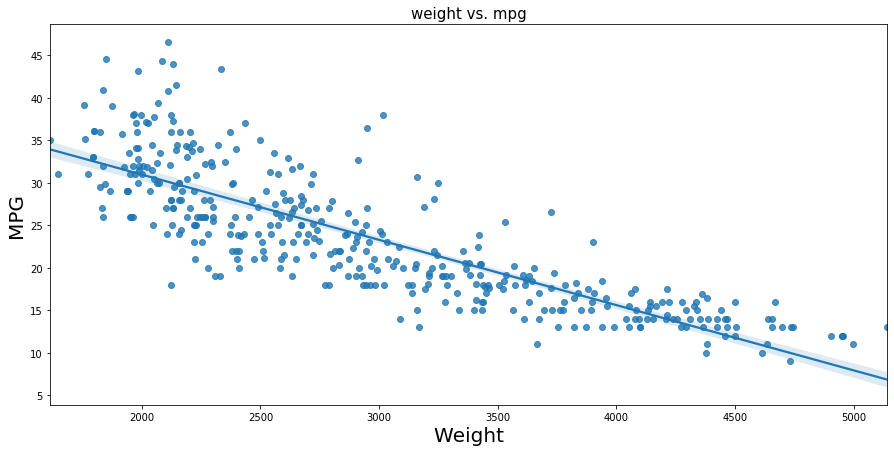

In [50]:
plt.figure(figsize=(15,7))
sns.regplot(data=df , x='weight',y='mpg')
plt.title("weight vs. mpg", fontsize=15)
plt.xlabel('Weight',fontsize=20)
plt.ylabel('MPG',fontsize=20);

>- as the weight of the car increase the car will burn more fuel to move

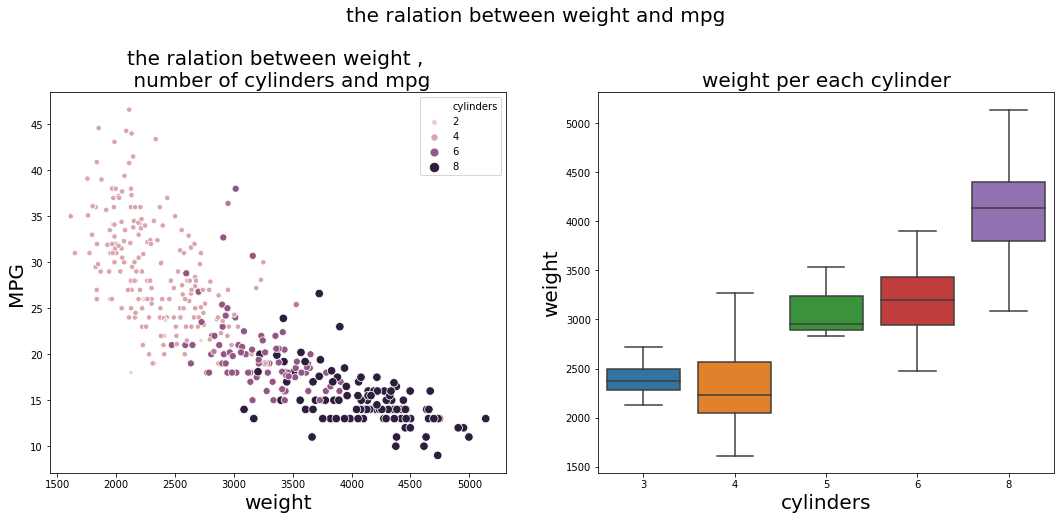

In [51]:
plt.figure(figsize=(18,7))
plt.subplot(1,2,1)
plt.suptitle('the ralation between weight and mpg',fontsize=20,y=1.05)
sns.scatterplot(data=df,x='weight',y='mpg',hue='cylinders',size='cylinders');
plt.xlabel('weight',fontsize=20)
plt.ylabel('MPG',fontsize=20)
plt.title('the ralation between weight , \n number of cylinders and mpg',fontsize=20)
plt.subplot(1,2,2)
sns.boxplot(data=df,x='cylinders',y='weight')
plt.ylabel('weight',fontsize=20)
plt.xlabel('cylinders',fontsize=20)
plt.title('weight per each cylinder',fontsize=20);

> - as we can see when the number of cylinder increase the car weight will increase and the car will burn more fuel to move

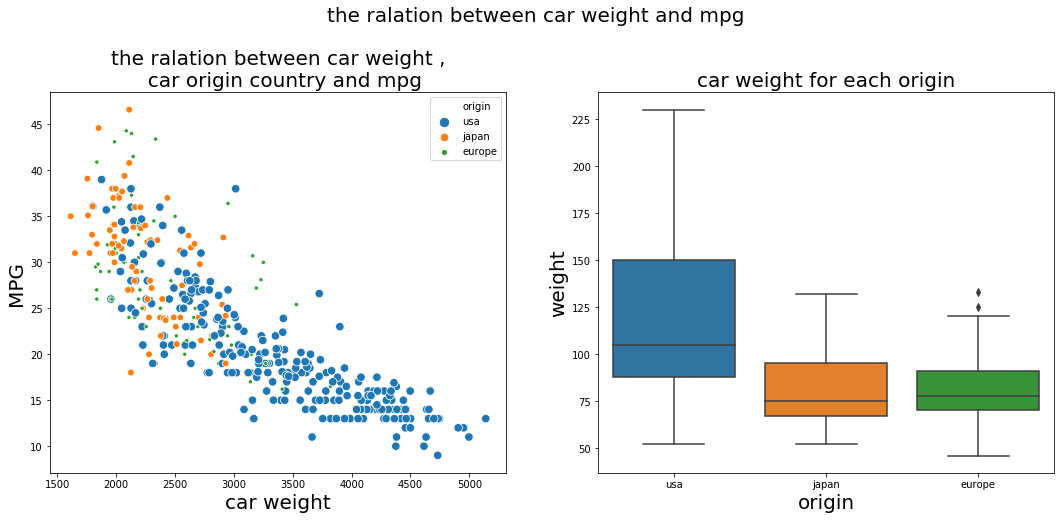

In [52]:
plt.figure(figsize=(18,7))
plt.subplot(1,2,1)
plt.suptitle('the ralation between car weight and mpg',fontsize=20,y=1.05)
sns.scatterplot(data=df,x='weight',y='mpg',hue='origin',size='origin');
plt.xlabel('car weight',fontsize=20)
plt.ylabel('MPG',fontsize=20)
plt.title('the ralation between car weight ,\n  car origin country and mpg',fontsize=20)
plt.subplot(1,2,2)
sns.boxplot(data=df,x='origin',y='horsepower')
plt.ylabel('weight',fontsize=20)
plt.xlabel('origin',fontsize=20)
plt.title('car weight for each origin',fontsize=20);

> ### Research Question 6 (the relation between acceleration and mpg!)
- acceleration shows how fact our car can acceleration per second which means Higher values indicate slower acceleration " take more time to accelete"

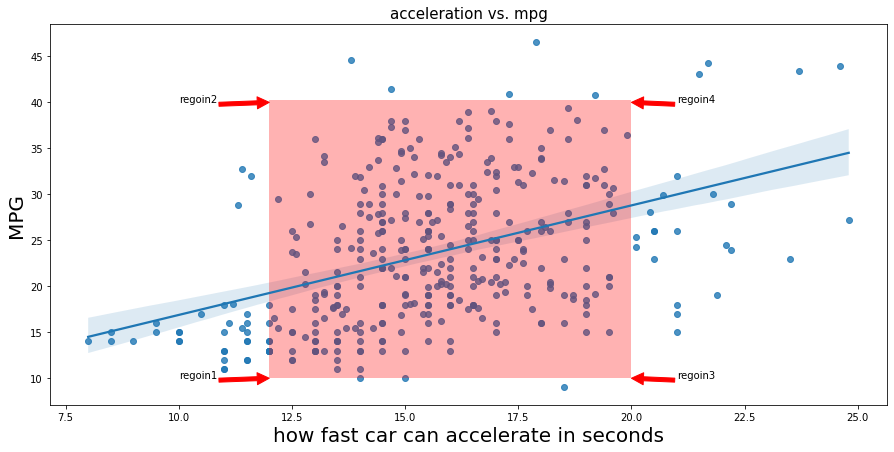

In [53]:
plt.figure(figsize=(15,7))
sns.regplot(data=df , x='acceleration',y='mpg')
plt.title("acceleration vs. mpg", fontsize=15)
plt.xlabel('how fast car can accelerate in seconds',fontsize=20)
plt.ylabel('MPG',fontsize=20);
plt.annotate('regoin1',xy=(12,10) , xytext=(10,10),arrowprops={'color':'r'})
plt.annotate('regoin2',xy=(12,40) , xytext=(10,40),arrowprops={'color':'r'})
plt.annotate('regoin3',xy=(20,10) , xytext=(21,10),arrowprops={'color':'r'})
plt.annotate('regoin4',xy=(20,40) , xytext=(21,40),arrowprops={'color':'r'})
#plt.axvline(x=12,color='r')
#plt.axvline(x=20,color='r')
plt.axvspan(xmin = 12, xmax =20, ymin =0.07, ymax =0.8 ,facecolor='r', alpha=0.3)

> - i don't think acceleration is a good feature for mpg because as we can see there is a small numer of cars that has acceleration < 10 and these car have low MPG so when the car accelate faster it burn more fuel, and most of the rest of the cars are between 12 : 20 and in this regon it seams as if there is no correlation because in this regin MPG varise from 10:40 in every where
- so just acceleration is not a good indicator for how amount for a car can drive mileage per gallon.

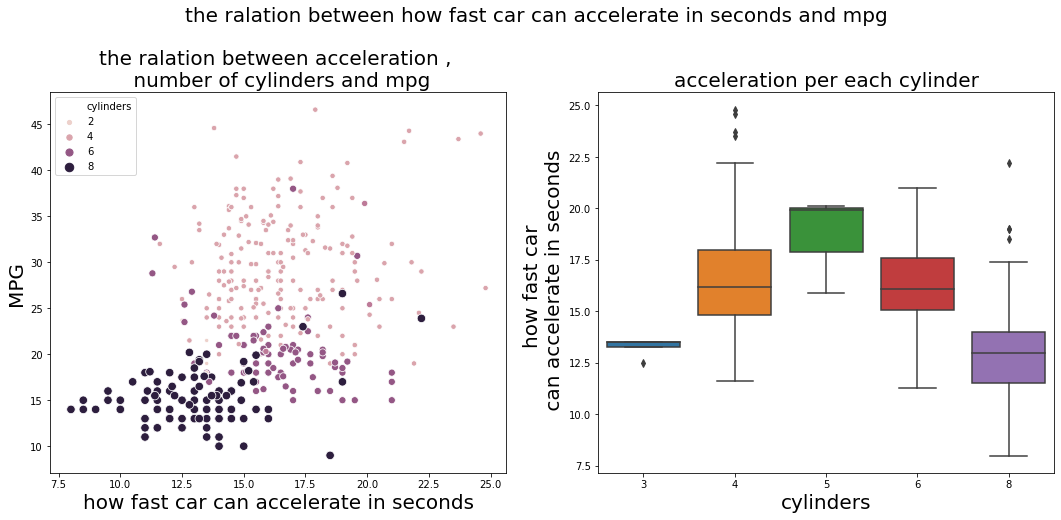

In [54]:
plt.figure(figsize=(18,7))
plt.subplot(1,2,1)
plt.suptitle('the ralation between how fast car can accelerate in seconds and mpg',fontsize=20,y=1.05)
sns.scatterplot(data=df,x='acceleration',y='mpg',hue='cylinders',size='cylinders');
plt.xlabel('how fast car can accelerate in seconds',fontsize=20)
plt.ylabel('MPG',fontsize=20)
plt.title('the ralation between acceleration , \n number of cylinders and mpg',fontsize=20)
plt.subplot(1,2,2)
sns.boxplot(data=df,x='cylinders',y='acceleration')
plt.ylabel('how fast car \n can accelerate in seconds',fontsize=20)
plt.xlabel('cylinders',fontsize=20)
plt.title('acceleration per each cylinder',fontsize=20);

> when the number of cylinder increase the car will accelate faster but it will burn more fuel

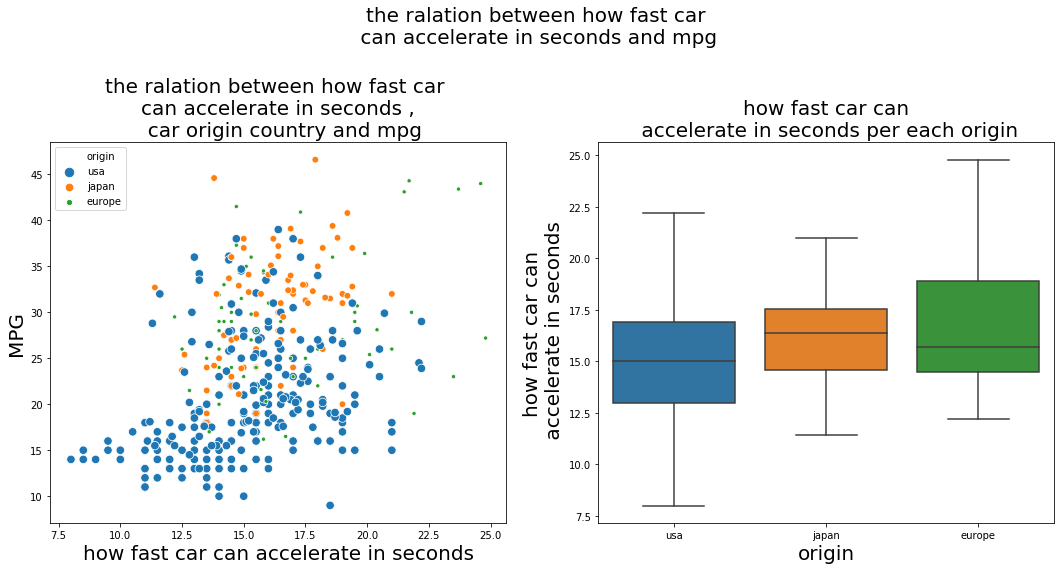

In [55]:
plt.figure(figsize=(18,7))
plt.subplot(1,2,1)
plt.suptitle('the ralation between how fast car\n can accelerate in seconds and mpg',fontsize=20,y=1.15)
sns.scatterplot(data=df,x='acceleration',y='mpg',hue='origin',size='origin');
plt.xlabel('how fast car can accelerate in seconds',fontsize=20)
plt.ylabel('MPG',fontsize=20)
plt.title('the ralation between how fast car \ncan accelerate in seconds ,\n  car origin country and mpg',fontsize=20)
plt.subplot(1,2,2)
sns.boxplot(data=df,x='origin',y='acceleration')
plt.ylabel('how fast car can\n accelerate in seconds',fontsize=20)
plt.xlabel('origin',fontsize=20)
plt.title('how fast car can\n accelerate in seconds per each origin',fontsize=20);

> The cars that can accelerate more faster is europe origin country.

<a id='conclusions'></a>
## Conclusions


>- The most frequency cylinder is 4
- The cars with 4 cylinders has the highest MPG
- The car from japan are the most effencient cars has the highest mpg with mpg average = 32 " less fuel consumption" and the car from usa are the least efficient ones with mpg average= 18
- As long as the engine size is small and we use a less number of cylinder like 4 there will be less fuel consumption
- The more increasing of cylinders and the engin size the the less efficient the car is, as It burns more fuel and drives less mileage per gallon.
- Using such big engin size like USA does make it has higher fuel consumption
- We have USA with the largest mean of Engine size with value = 250
- Car with 8 cylinders has the largest engine power which means more fuel burn and less MPG
- In MPG vs year There are some ups and downs, But average miles per gallon has increased over time, with high standard deviation number.
- Mileage per gallon in cars with the USA country origin has increased over time, Specially since the beginning of 1975. But japan and europe cantry origin is randomly distributed (ups and downs of mpg over time) 
- Although USA is the only country that has a stabel increase in mpg , it still the less efficient , and even when japan and europ have some downs it still higher than USA in the same year
- As the weight of the car increase the car will burn more fuel to move
- When the number of cylinder increase the car will accelate faster but it will burn more fuel

<a id='modeling'></a>
## modeling

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error,r2_score

In [57]:
df.corr()['mpg']

mpg             1.000000
cylinders      -0.775396
displacement   -0.804203
horsepower     -0.773453
weight         -0.831741
acceleration    0.420289
model_year      0.579267
Name: mpg, dtype: float64

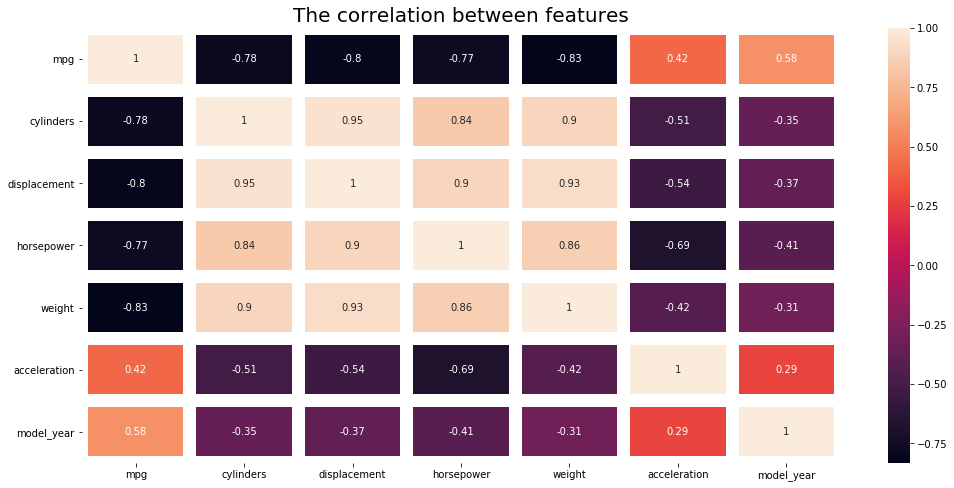

In [58]:
plt.figure(figsize=(17,8))
sns.heatmap(df.corr(),annot=True,linewidths=12)
plt.title("The correlation between features", y=1.02, fontsize=20);

>- we can see that all the numerical feature have strong correlatin with the target mpg so we will use all of them
- and the categorical variables we have already saw the boxplot and there we no overlap so i can use them too

In [59]:
y=df["mpg"]
x=df.drop("mpg", axis=1)

> as we have caregorival variabels `origin` we will start with onehot encoding
### get the dummies

In [60]:
dummies = pd.get_dummies(df['origin'])
dummies

,europe,japan,usa
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
393,0,0,1
394,1,0,0
395,0,0,1
396,0,0,1


### concat the dummmies with my original data using concat method

In [61]:
merged = pd.concat([df,dummies],axis=1)
merged

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,europe,japan,usa
0,18.0,8,307.0,130.0,3504,12.0,70,usa,0,0,1
1,15.0,8,350.0,165.0,3693,11.5,70,usa,0,0,1
2,18.0,8,318.0,150.0,3436,11.0,70,usa,0,0,1
3,16.0,8,304.0,150.0,3433,12.0,70,usa,0,0,1
4,17.0,8,302.0,140.0,3449,10.5,70,usa,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,0,0,1
394,44.0,4,97.0,52.0,2130,24.6,82,europe,1,0,0
395,32.0,4,135.0,84.0,2295,11.6,82,usa,0,0,1
396,28.0,4,120.0,79.0,2625,18.6,82,usa,0,0,1


### drop the categorical column

In [62]:
X = merged.drop(["origin"],axis='columns')
X

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,europe,japan,usa
0,18.0,8,307.0,130.0,3504,12.0,70,0,0,1
1,15.0,8,350.0,165.0,3693,11.5,70,0,0,1
2,18.0,8,318.0,150.0,3436,11.0,70,0,0,1
3,16.0,8,304.0,150.0,3433,12.0,70,0,0,1
4,17.0,8,302.0,140.0,3449,10.5,70,0,0,1
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,0,0,1
394,44.0,4,97.0,52.0,2130,24.6,82,1,0,0
395,32.0,4,135.0,84.0,2295,11.6,82,0,0,1
396,28.0,4,120.0,79.0,2625,18.6,82,0,0,1


### Now, Let's split our dataset into trainig and testing.

In [63]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=4)

### using linear regression model

In [64]:
LR=LinearRegression()

LR.fit(x_train, y_train)
prediction = LR.predict(x_test)
print("R2-score: %.2f" % r2_score(y_test , prediction) )

R2-score: 1.00


training score

In [65]:
train_prediction = LR.predict(x_train)

In [66]:
print("R2-score for train: %.2f" % r2_score(y_train , train_prediction) )

R2-score for train: 1.00
